**1. Importing Necessary libraries**

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [2]:
os.chdir('C:/Users/LILA/RTT-RSS with Kalman/raw_dataset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff

,#<Time(ms)>,<True Range(m)>,<Est. Range(m)>,<Std dev(m)>,<Successes#>,<Burst#>,<RSSI(dBm)>,<Ch-MHz>,<AP-SSID>,<RTT AP?>
0,14011119,10,10.178,0.674,7,8,-72,5180,GoogleWiFi_AP03,1
1,14011501,10,10.452,0.142,7,8,-67,5180,GoogleWiFi_AP03,1
2,14011877,10,10.803,0.077,7,8,-72,5180,GoogleWiFi_AP03,1
3,14012262,10,10.530,0.194,7,8,-71,5180,GoogleWiFi_AP03,1
4,14012646,10,10.647,0.083,7,8,-67,5180,GoogleWiFi_AP03,1
...,...,...,...,...,...,...,...,...,...,...
294,13946465,9,8.655,0.125,7,8,-60,5180,GoogleWiFi_AP03,1
295,13946848,9,8.538,0.173,7,8,-60,5180,GoogleWiFi_AP03,1
296,13947235,9,8.420,0.182,7,8,-60,5180,GoogleWiFi_AP03,1
297,13947621,9,8.655,0.112,7,8,-60,5180,GoogleWiFi_AP03,1


In [3]:
dfff.drop(['#<Time(ms)>','<Ch-MHz>','<Burst#>','<AP-SSID>','<Successes#>','<Std dev(m)>','<RTT AP?>'],axis=1,inplace=True)

In [4]:
dfff.rename(columns={'<True Range(m)>': 'True_Range', '<Est. Range(m)>': 'Est_Range','<RSSI(dBm)>': 'RSSI'}, inplace=True)
dfff

,True_Range,Est_Range,RSSI
0,10,10.178,-72
1,10,10.452,-67
2,10,10.803,-72
3,10,10.530,-71
4,10,10.647,-67
...,...,...,...
294,9,8.655,-60
295,9,8.538,-60
296,9,8.420,-60
297,9,8.655,-60


**2. Extracting input and output data from Dataframe**

In [5]:
X_valid = dfff.iloc[:,-2:].values
y_valid = dfff['True_Range'].values
X_valid

array([[ 10.178, -72.   ],
       [ 10.452, -67.   ],
       [ 10.803, -72.   ],
       ...,
       [  8.42 , -60.   ],
       [  8.655, -60.   ],
       [  8.733, -61.   ]])

In [6]:
X_valid = sc.fit_transform(X_valid)


In [7]:
input_data=X_valid
output_data=y_valid

In [8]:

output_data = np.array(output_data)
output_data.shape

(7472,)

In [9]:
# input_data = input_data.values #conversting dataframe format to array format
# input_data = input_data.reshape(-1,1)
X=input_data

In [10]:
output_data

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

**3. Creating Multiple class using Onehot Encoder of output**

In [11]:

from sklearn.preprocessing import OneHotEncoder
# Create a one-hot encoder object
one_hot_encoder = OneHotEncoder()

# Fit and transform the one-hot encoder on your output data
output_data = np.array(output_data)
encoded_output = one_hot_encoder.fit_transform(output_data.reshape(-1,1))
# Convert the encoded output data to a NumPy array format
#encoded_output = np.array(encoded_output)
encoded_output = encoded_output.toarray()
y=encoded_output


In [12]:
#output_data=output_data.values

In [13]:
input_data

array([[-0.35552044, -0.67798808],
       [-0.31896348, -0.03801146],
       [-0.27213322, -0.67798808],
       ...,
       [-0.590072  ,  0.85795581],
       [-0.55871841,  0.85795581],
       [-0.54831168,  0.72996048]])

**4. Importing necessary libraries and create the DNN model**

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dropout

optimizer = Adam(learning_rate=0.0001)

# Initialize the model
model = Sequential()

# Add the first hidden layer with 64 neurons and input shape as the shape of the input data
model.add(Dense(64, activation='relu', input_shape=(2,)))

# Add the second hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

# Add the third hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

# Add the fourth hidden layer with 32 neurons
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

# Add the output layer with 25 neurons for the 25 categories, and use softmax activation for multiclass classification
model.add(Dense(25, activation='softmax'))

# Compile the model, using categorical_crossentropy loss for multiclass classification, and 'adam' optimizer
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 25)                3225      
                                                                 
Total params: 28,249
Trainable params: 28,249
Non-trainable params: 0
_________________________________________________________________


In [15]:
from sklearn.model_selection import train_test_split

# assuming your data is in X and y variables
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_output, test_size=0.3, random_state=42)

In [16]:
X_train

array([[-0.54310832,  0.72996048],
       [ 1.10382257, -1.18996937],
       [-0.37113052,  0.08998386],
       ...,
       [-1.28452074,  0.85795581],
       [-0.08441192,  0.60196516],
       [-0.53790496,  1.24194178]])

**5. Standarizing the data- Preprocessing**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#X_val = sc.fit_transform(X_val)
X_train.shape

(5230, 2)

In [18]:
X_train

array([[-0.54690047,  0.7255474 ],
       [ 1.11779034, -1.17619645],
       [-0.37306812,  0.09163278],
       ...,
       [-1.29630802,  0.85233032],
       [-0.08325764,  0.59876447],
       [-0.54164099,  1.23267909]])

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, monitor='val_loss')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping])

Epoch 1/500
164/164 [==============================] - 0s 2ms/step - loss: 3.1140 - accuracy: 0.1379 - val_loss: 2.9822 - val_accuracy: 0.1722
Epoch 2/500
164/164 [==============================] - 0s 968us/step - loss: 2.7511 - accuracy: 0.2084 - val_loss: 2.5331 - val_accuracy: 0.2190
Epoch 3/500
164/164 [==============================] - 0s 967us/step - loss: 2.2792 - accuracy: 0.2574 - val_loss: 2.1132 - val_accuracy: 0.2493
Epoch 4/500
164/164 [==============================] - 0s 969us/step - loss: 1.9111 - accuracy: 0.3315 - val_loss: 1.8190 - val_accuracy: 0.3194
Epoch 5/500
164/164 [==============================] - 0s 980us/step - loss: 1.6636 - accuracy: 0.4163 - val_loss: 1.6112 - val_accuracy: 0.4202
Epoch 6/500
164/164 [==============================] - 0s 986us/step - loss: 1.4804 - accuracy: 0.5132 - val_loss: 1.4459 - val_accuracy: 0.5549
Epoch 7/500
164/164 [==============================] - 0s 902us/step - loss: 1.3367 - accuracy: 0.6027 - val_loss: 1.3186 - val_accu

In [22]:
## evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

71/71 [==============================] - 0s 498us/step - loss: 0.3751 - accuracy: 0.8715
Test loss: 0.3751157820224762
Test accuracy: 0.871543288230896


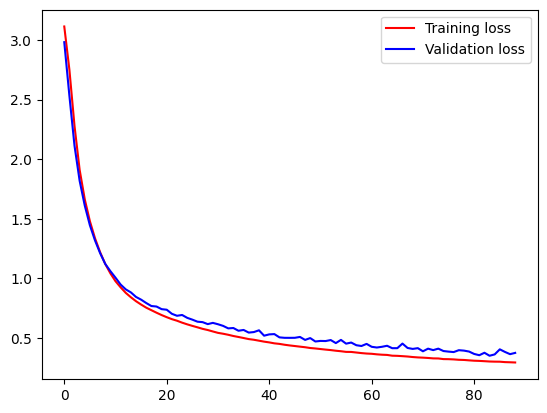

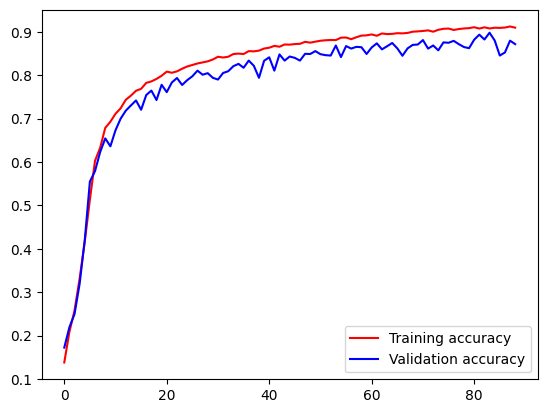

In [23]:
# Plot the loss curve
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss' )
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(X_test)

71/71 [==============================] - 0s 408us/step


In [25]:
y_pred

array([[1.2304417e-27, 4.3352694e-35, 0.0000000e+00, ..., 4.6251106e-01,
        5.3480065e-01, 9.7043253e-09],
       [2.1418097e-34, 1.4570907e-29, 5.1552603e-23, ..., 1.0527843e-27,
        0.0000000e+00, 0.0000000e+00],
       [4.0570207e-26, 4.6823746e-33, 7.0050021e-36, ..., 9.5459527e-01,
        2.2311067e-02, 1.8859948e-08],
       ...,
       [6.0088597e-21, 4.6234617e-26, 3.4498161e-24, ..., 1.0957948e-07,
        1.1157800e-13, 7.3786416e-10],
       [8.0376894e-22, 4.3179041e-28, 3.0868560e-28, ..., 8.6766743e-04,
        7.9411798e-08, 2.0773527e-05],
       [1.4481135e-32, 1.6771953e-26, 2.8905608e-17, ..., 6.0070741e-32,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [26]:
y_pred.shape

(2242, 25)

In [27]:
# Decode the one-hot encoded data
#y_pred= one_hot_encoder.inverse_transform(y_pred)
y_pred= np.argmax(y_pred, axis=1)
# Convert the decoded output data to a NumPy array format
y_pred = np.array(y_pred)

# Print the decoded output data
print(y_pred)

[23 10 22 ... 20 20  6]


In [28]:
y_pred=y_pred.flatten()
y_pred

array([23, 10, 22, ..., 20, 20,  6], dtype=int64)

In [29]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Decode the one-hot encoded data
#y_test= one_hot_encoder.inverse_transform(y_test)
y_test=np.argmax(y_test, axis=1)
# Convert the decoded output data to a NumPy array format
y_test = np.array(y_test)

# Print the decoded output data
print(y_test)

[23 10 22 ... 20 21  6]


In [31]:
y_test = y_test.flatten()
y_test

array([23, 10, 22, ..., 20, 21,  6], dtype=int64)

**6. Confusion Matrix and Classification Report**

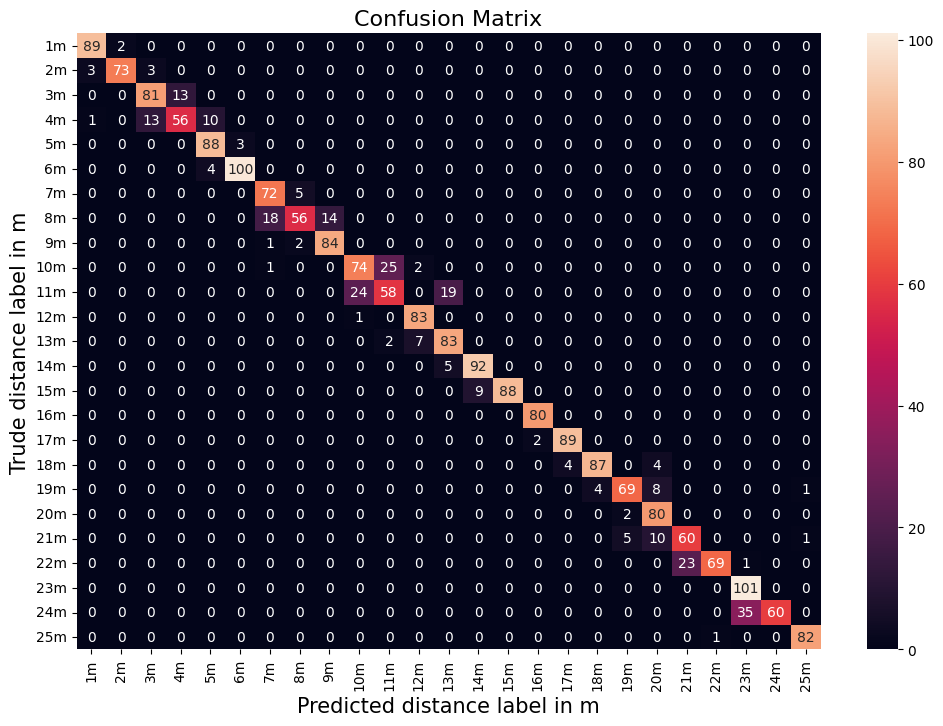

Accuracy of Model with Kalman Filter:  0.8715432649420161


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
array=np.array(conf_mat)
df_cm = pd.DataFrame(array, index = [str(i)+"m" for i in range(1,26)],
                  columns = [str(i)+"m" for i in range(1,26)])

plt.figure(figsize = (12,8))

# import seaborn as sns
# sns.heatmap(df_cm, annot=True)

a=sns.heatmap(df_cm, annot=True, fmt='d')
a.set_xlabel('Predicted distance label in m', fontsize=15)
a.set_ylabel('Trude distance label in m', fontsize=15)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Model with Kalman Filter: ', accuracy)

In [33]:
# Create a custom label for each class
labels = [f"{i + 1}m" for i in range(25)]

# Generate the classification report
print(classification_report(y_test, y_pred, target_names=labels))




              precision    recall  f1-score   support

          1m       0.96      0.98      0.97        91
          2m       0.97      0.92      0.95        79
          3m       0.84      0.86      0.85        94
          4m       0.81      0.70      0.75        80
          5m       0.86      0.97      0.91        91
          6m       0.97      0.96      0.97       104
          7m       0.78      0.94      0.85        77
          8m       0.89      0.64      0.74        88
          9m       0.86      0.97      0.91        87
         10m       0.75      0.73      0.74       102
         11m       0.68      0.57      0.62       101
         12m       0.90      0.99      0.94        84
         13m       0.78      0.90      0.83        92
         14m       0.91      0.95      0.93        97
         15m       1.00      0.91      0.95        97
         16m       0.98      1.00      0.99        80
         17m       0.96      0.98      0.97        91
         18m       0.96    

Precision: number of true positives divided by the number of true positives and false positives

Recall: number of true positives divided by the number of true positives and false negatives

F1-score: the harmonic mean of precision and recall

Support: number of samples in the corresponding class.

